# Logistic Regression is Classification
<br><br>
Logistic Regression is used for classification. If you have data that falls within two categories, say 1 or 0, you can use the following model:
<br><br>
$$P(y|x, w) = Ber(y|sigm(w^Tx))$$
<br>
where Ber() is the Bernoulli distribution whose pmf is $f(k,p) = p^k(1-p)^{1-k}, k \in \{0,1\} $ and $p$ is the probability of k = 1. $Sigm$ is the sigmoid function characterized as: 
<br>
$$s(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1} $$
<br><br>
Note that the $s(-\infty)=0$, $s(0)=.5$ and $s(\infty)=1$. So in the image below which is taken from the book 'Machine Learning: A probabilistic Perspective by Kevin P. Murphy', the right most figure shows the data in the black dots. The x-axis is the SAT score of a group of students and the y-axis is whether or not they passed a particular test other than the SAT. So the data is showing that, for the most part, and this is important because the data is not completely separable, the higher the SAT score, the higher the likelihood of passing the other exam. The left figure shows the sigmoid function. So in the right figure logistic regression is shown by the red circles. If you were to run a linear regression on the data you would see a line like the green one on the right figure. As you can see, logistic regression does a better job of fitting the data.
<br>
![logistic regression](logistic-regression.png)

With all that in mind here is the derivation of the MLE expression for the logistic regression model. Remember that *NLL* stands for negative log likelihood.
$$\theta_{logistic \space regression} = \underset{w}{\mathrm{argmax}} \quad NLL(w)$$
$$= - \sum_{i=1}^{N} log[p_i^{\mathbb{1}(y_i=1)}(1-p_i)^{\mathbb{1}(y_i=0)}]$$
$$= - \sum_{i=1}^{N} y_ilog(p_i) + (1-y_i)log(1-p_i)$$
<br><br> 
Note that $y_i \in {0,1}$ or $y_i \in \{-1,1\}$ and if you chose the latter you end up with the following sigmoid functions:
<br><br>
$p(y=-1) = \frac{1}{1 + e^{x}}$ and $p(y=1) = \frac{1}{1 + e^{-x}}$
<br><br>
so that solution becomes:
<br><br>
$$NLL(w) = - \sum_{i=1}^{N} log(1+e^{y_iw^Tx})$$
<br><br>
The *NLL(w)* expression no longer has a closed form solution. You need the gradient and Hessian in order to use optimization to compute the solution.
<br>

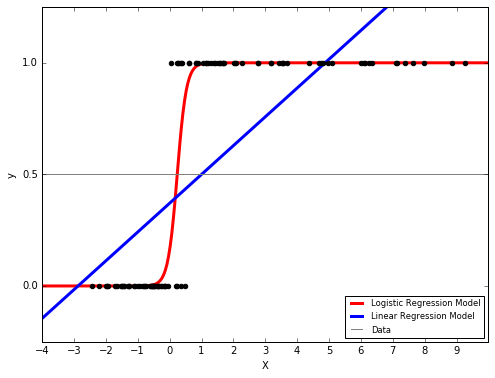

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)
# and plot the result
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3, label='lo')

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=3, color='blue', label='lr')
plt.axhline(.5, color='.5')


plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model', 'Data'), 
           loc="lower right", fontsize='small')
plt.show()

<br><br>
# Key Take Away
<br>
Logistic Regression is classification, not regression. It uses the Bernoulli distribution and sigmoid function to provide a probability measure.

In [62]:
'''
In this example we are reading in a house description and sale dataset. For this classification we are going to 
estimate whether a house will sell(and with what probability) within 90 days of being put on the market.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# this data has already been cleaned up, standardized, one hot encoded and vetted
df = pd.read_csv("classification_house_sale_px_data.csv", parse_dates=True, sep=',', header=0)
df_labels = pd.read_csv("classification_house_sale_px_labels.csv", parse_dates=True, sep=',', header=0)

# split data into training and test sets
train, test, y_train, y_test = train_test_split(df, df_labels, train_size=.6, test_size=.4, shuffle=True)

# run the classifier on the training data
clf = LogisticRegression(C=1e5)
clf.fit(train, list(y_train.label.values))
# make prediction on the test data
#predicted = clf.predict(test)
print("Logistic Regresion: Test set accuracy (R^2) = {0:.3f}".format(clf.score(test, y_test.label.values)))

Logistic Regresion: Test set accuracy (R^2) = 0.561
